# Análisis exploratorio

<a id='contents' />

## Tabla de contenidos

1. [Carga de librerías y datos](#loading)
2. [Fechas](#dates)
3. [Variables categóricas](#categories)
4. [Variables continuas](#continuous)

<a id='loading' />

## Carga de librerías y datos
[(back to top)](#contents)

In [1]:
import os
import numpy as np 
import pandas as pd
import datetime
import seaborn as sns
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats

In [10]:
df = pd.read_csv('../data/creditcard.csv', delimiter=',', nrows=500)

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [1]:
len(df)

80000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

**Descripción breve de cada columna:**

|     Nombre de la variable    |                    Descripción                   |                                                                                                  Notas                                                                                                  |
|:--------------------:|:----------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|          accountid         |              Identificador único de usuario              |                                                                   Cada usuario tiene un ID diferente                                                                |
|      bankid    | ID bancario |  Múltiples transacciones pueden compartir el mismo Bank ID                                                |
|         transactionid         | Identificador único de la transacción |                                                                                Único para cada transacción|
|         transactiondate        | Fecha de la transacción |   Timestamp without timezone   |
|         message        | Mensaje incluido en la transacción |   -   |
|         currency         |   Código de la moneda         |   -                                |
|     metadata    |          Información sobre la transacción          |      -     |
|      office     |         ?         |     -                                       |
| idtransactiontype |   ID tipo de transacción  |    -                              |
|        trx_name        |                  Tipo de transacción                 |     -                                                                                                                                                                                                   |
|       createddate_account       |    Fecha de creación de la cuenta (para verificar antiguedad)   |                                                                Timestamp without timezone |
|       gender       |         Género        |                  |
|       province       |       Provincia      | En función de la dirección a donde fue enviada la tarjeta |
|       nationality    |            Nacionalidad            |          -            |
|    occupation        |       Ocupación       |  Varchar |
|       maritalstatus  |   Estado civil  |   Varchar  |
|       pep       |  Políticamente expuesto (personas con cargo público)  |                                                   Boolean                                                  |
|       age      |  Edad |   En función de la fecha de nacimiento  |

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<a id='dates' />

## Manejo de fechas
[(back to top)](#contents)

In [31]:
df['transactiondate']=pd.to_datetime(df['Time'])
df['weekday'] = df.transactiondate.dt.dayofweek.astype("category")
df['weekday_name']= df['weekday'].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

In [45]:
def plot_time(df, time_var, title, rot = 0):
    res = df.groupby([time_var])['V1'].count().reset_index(name="count")
    p = res.plot(x = time_var, y = "count", title = title, rot = rot)
    return p

In [90]:
#df['day']=[random.randrange(1, 30, 1) for iter in range(len(df))]
df['day']=df['transactiondate'].dt.day

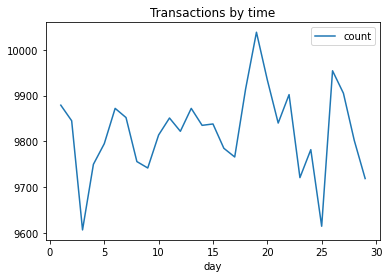

In [101]:
plot_time(df, 'day', 'Transactions by time')

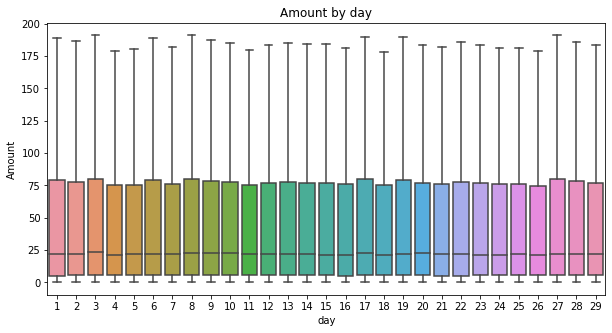

In [122]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="day",y="Amount",data=df,orient="vertical",showfliers=False)
plt.title('Amount by day')
plt.show()

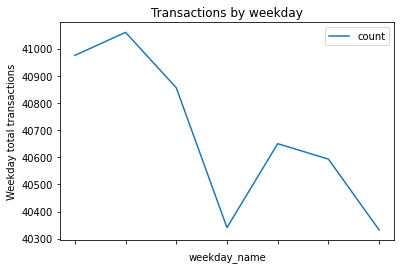

In [39]:
p_monthly = plot_time( df, 'weekday_name', 'Transactions by weekday')
_ = plt.ylabel("Weekday total transactions")

Amount distribution by weekday

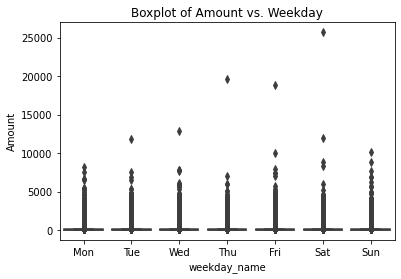

In [123]:
sns.boxplot(x='weekday_name',y= 'Amount', data = df)
plt.ylabel("Amount")
plt.title("Boxplot of Amount vs. Weekday")
plt.show()

In [67]:
df['hour']=pd.to_datetime(df['transactiondate']).dt.hour

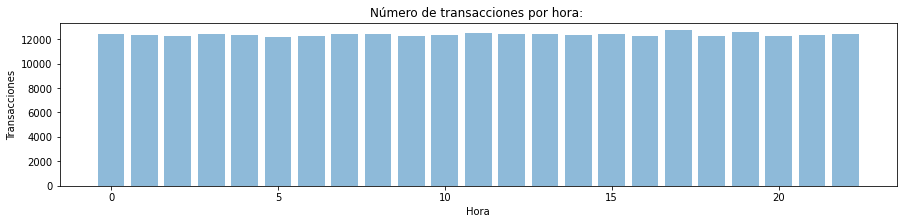

In [68]:
# Line plot del número de transacciones por hora
hourly_transactions=df.groupby(['hour'])['V1'].count().reset_index(name='transactions')
fig, ax = plt.subplots(figsize=(15, 3))
plt.bar(hourly_transactions['hour'], hourly_transactions['transactions'], align='center', alpha=0.5)

#Formater for graph
plt.title('Número de transacciones por hora: ')
plt.xlabel('Hora')
plt.ylabel('Transacciones')
plt.show()

Conclusiones:

- Hay días de la semana con más transacciones? Por qué?
- Revisión del monto de la transacción por día de la semana
- Revisar días del mes (primeros, últimos, mitad), fin de semana vs. entre semana

<a id='categories' />

## Variables categóricas (eg. office, trx_name, idtransactiontype)
[(back to top)](#contents)

In [62]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Transaction type versus weekday

In [66]:
res_raw = pd.crosstab(df['Class'], df['weekday_name'])
#Normalizar los datos para que las comparaciones sean justas a través de los días de la semana
res_raw/pd.date_range("2020-6-1","2020-6-30",freq="D").dayofweek.value_counts().tolist()[::-1]

weekday_name,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Class,,,,,,,
0,10228.75,10246.25,10196.0,10067.25,10145.0,8106.8,8049.6
1,15.00,18.75,18.0,18.00,17.5,11.8,16.8


In [76]:
pd.crosstab(df['gender'], df['weekday_name'])

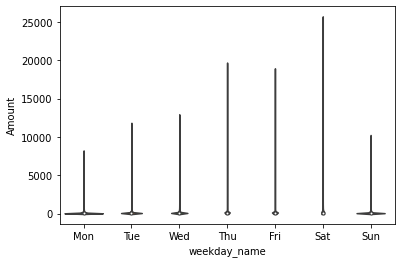

In [79]:
sns.violinplot(x='weekday_name', y='Amount', data=df)

In [86]:
categorical_variables=['Class']

In [118]:
df['log_amount']=np.log(df['Amount'])
df['log_amount'].replace([np.inf, -np.inf], 0, inplace=True)

/Users/mafecor/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


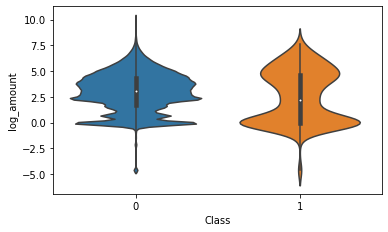

In [120]:
plt.figure(figsize=(20,20))
for i,var in enumerate(categorical_variables):
    plt.subplot(5,3,i+1)
    sns.violinplot(x=var, y='log_amount', data=df)

<a id='continuous' />

## Continuous variables
[(back to top)](#contents)

Distribution

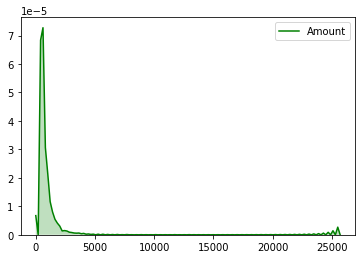

In [102]:
sns.kdeplot(df['Amount'],shade = True, label="Amount",color="g")

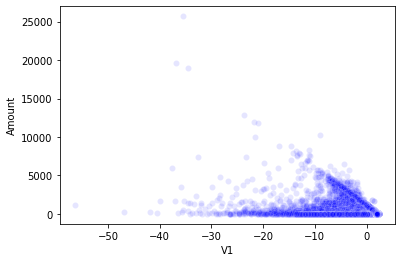

In [81]:
sns.scatterplot(x='V1',y='Amount',data=df, alpha=0.10,color='b')

Correlations

In [77]:
corr_mat  = df[['V1', 'V2', 'V3', 'V4', 'V5']].corr()
corr_mat

,V1,V2,V3,V4,V5
V1,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17
V2,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16
V3,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15
V4,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15
V5,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00


Text(0.5, 1.0, 'Correlation Matrix')

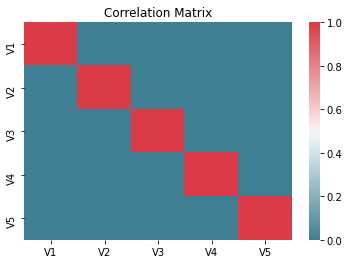

In [78]:
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

Heatmaps:

In [95]:
df_amount=df.groupby(['hour', 'day'])['Amount'].mean().reset_index(name='average_amount')

Text(0.5, 1.0, 'Average transaction by day and hour')

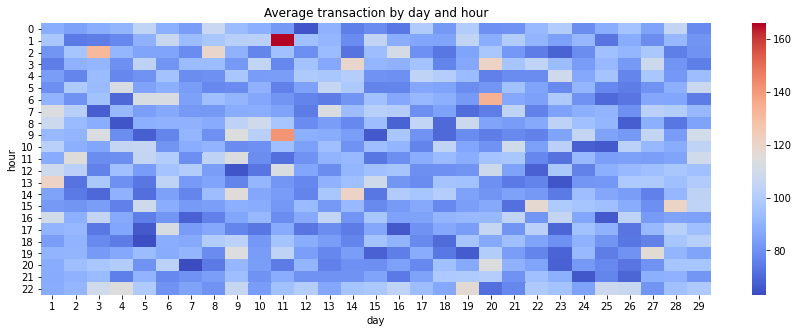

In [100]:
# Heat map del monto de la transacción por hora y día
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df_amount.pivot('hour', 'day', 'average_amount'), cmap="coolwarm", ax=ax)
ax.set_title("Average transaction by day and hour")

Difference of amount by weekday

In [133]:
mod = ols('Amount ~ weekday', data=df).fit()  
aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
weekday,1.657601e+05,6.0,0.441597,0.851365
Residual,1.781732e+10,284800.0,NaN,NaN


Pvalue>0.05: Weekday has no significant effect in the amount.

Difference of amount by Class

In [132]:
class_1=df[df.Class==1].Amount
class_0=df[df.Class==0].Amount

statistic, pvalue = stats.ttest_ind(class_1,class_0, equal_var=False)
statistic, pvalue

(2.928789530856467, 0.003560518851710299)

Pvalue<0.05: Class has significant effect in the amount.